<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Подготовка-и-изучение-данных" data-toc-modified-id="1.-Подготовка-и-изучение-данных-1">1. Подготовка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#1.1-Общая-информация-о-клиентах" data-toc-modified-id="1.1-Общая-информация-о-клиентах-1.1">1.1 Общая информация о клиентах</a></span></li><li><span><a href="#1.2-Информация-о-совершенных-звонках" data-toc-modified-id="1.2-Информация-о-совершенных-звонках-1.2">1.2 Информация о совершенных звонках</a></span></li><li><span><a href="#1.3-Информация-об-интернет-трафике" data-toc-modified-id="1.3-Информация-об-интернет-трафике-1.3">1.3 Информация об интернет-трафике</a></span></li><li><span><a href="#1.4-Информация-о-переданых-сообщениях" data-toc-modified-id="1.4-Информация-о-переданых-сообщениях-1.4">1.4 Информация о переданых сообщениях</a></span></li><li><span><a href="#1.5-Описание-тарифов" data-toc-modified-id="1.5-Описание-тарифов-1.5">1.5 Описание тарифов</a></span></li><li><span><a href="#1.6-Вывод" data-toc-modified-id="1.6-Вывод-1.6">1.6 Вывод</a></span></li></ul></li><li><span><a href="#2-Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="2-Расчёты-и-добавление-результатов-в-таблицу-2">2 Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#2.1-Вывод" data-toc-modified-id="2.1-Вывод-2.1">2.1 Вывод</a></span></li></ul></li><li><span><a href="#3-Анализ-данных" data-toc-modified-id="3-Анализ-данных-3">3 Анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#3.1-Вывод" data-toc-modified-id="3.1-Вывод-3.0.1">3.1 Вывод</a></span></li></ul></li></ul></li><li><span><a href="#4-Проверка-гипотез" data-toc-modified-id="4-Проверка-гипотез-4">4 Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#4.1-Вывод" data-toc-modified-id="4.1-Вывод-4.1">4.1 Вывод</a></span></li></ul></li><li><span><a href="#5-Общий-вывод" data-toc-modified-id="5-Общий-вывод-5">5 Общий вывод</a></span></li></ul></div>

Проект представляет собой анализ поведения клиентов оператора сотовой связи. Цель проекта - выявить тарифный план, пользующийся наибольшей популярностью у клиентов, для корректировки рекламного бюджета. 
Размер выборки - 500 пользователей, период - 2018 год.  Данные представлены в пяти файлах - общая информация о клиентах, данные о звонках, сообщениях, использовании интернета и общая информация о тарифах.

# 1. Подготовка и изучение данных

## 1.1 Общая информация о клиентах

In [123]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df_u = pd.read_csv(r'C:\Users\Гена\Desktop\DA\Учебные проекты\Telecom\users.csv')
display(df_u.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Проверим данные на пропуски, изменим тип данных в столбцах churn_date и reg_date на дату.

In [125]:
df_u.isna().mean()

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

In [126]:
df_u['reg_date'] = pd.to_datetime(df_u['reg_date'], format = '%Y-%m-%d')
df_u['churn_date'] = pd.to_datetime(df_u['churn_date'], format = '%Y-%m-%d', errors='coerce')
df_u.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

Пропусков нет, значния NaN в столбце churn_date означают, что 92% пользователей из выборки на дату выгрузки являются клиентами оператора. Типы данных соответствуют данным таблицы.  
Добавим столбец reg_month, где сохраним данные о месяце регистрации клиента. Сгруппируем данные для последующего анализа 

In [127]:
df_u['reg_month'] = df_u['reg_date'].astype('datetime64[M]')
df_u['churn_month'] = df_u['churn_date'].astype('datetime64[M]')
df_u.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
275,1275,48,NaT,Москва,Семён,Елизаров,2018-04-24,smart,2018-04-01,NaT
24,1024,73,NaT,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,2018-10-01,NaT
224,1224,58,NaT,Магнитогорск,Ахмет,Тарасов,2018-04-24,smart,2018-04-01,NaT
359,1359,52,NaT,Москва,Константин,Абашкин,2018-07-27,smart,2018-07-01,NaT
193,1193,55,NaT,Тамбов,Арсен,Безруков,2018-01-01,smart,2018-01-01,NaT


In [128]:
users = df_u.groupby('user_id')[['churn_month', 'reg_date', 'reg_month', 'tariff', 'city']].min().reset_index()
users.tail()

,user_id,churn_month,reg_date,reg_month,tariff,city
495,1495,NaT,2018-08-28,2018-08-01,ultra,Иркутск
496,1496,NaT,2018-01-27,2018-01-01,smart,Вологда
497,1497,NaT,2018-10-09,2018-10-01,smart,Челябинск
498,1498,2018-10-01,2018-07-19,2018-07-01,smart,Владикавказ
499,1499,NaT,2018-09-27,2018-09-01,smart,Пермь


Данные по использованным услугам распределены в четырех таблицах. Для их последующего объединения в сгруппированной таблице создадим столбец key.

In [129]:
users['key'] = 1
users.head()

,user_id,churn_month,reg_date,reg_month,tariff,city,key
0,1000,NaT,2018-05-25,2018-05-01,ultra,Краснодар,1
1,1001,NaT,2018-11-01,2018-11-01,smart,Москва,1
2,1002,NaT,2018-06-17,2018-06-01,smart,Стерлитамак,1
3,1003,NaT,2018-08-17,2018-08-01,ultra,Москва,1
4,1004,NaT,2018-05-14,2018-05-01,ultra,Новокузнецк,1


Данные предоставлены за 2018 года. Создадим таблицу dt, где отразим все месяцы 2018, для объединения с таблицей users. Делаем это для того, чтобы не потерять впоследствии данные, когда клиент в течение месяца не пользовался какой-либо услугой в тарифе (т.е. нужно сохранить информацию, когда клиент не был активен).

In [130]:
min_date_c = df_u['reg_month']. min()
max_date_c = df_u['reg_month']. max()
dt = pd.DataFrame(pd.date_range(min_date_c, max_date_c, freq = 'MS'))
dt.columns = ['month']
dt['key']= 1
dt

,month,key
0,2018-01-01,1
1,2018-02-01,1
2,2018-03-01,1
3,2018-04-01,1
4,2018-05-01,1
5,2018-06-01,1
6,2018-07-01,1
7,2018-08-01,1
8,2018-09-01,1
9,2018-10-01,1


In [131]:
df = dt.merge(users, on ='key')[['month', 'user_id', 'tariff', 'reg_date', 'reg_month', 'churn_month', 'city']]
df.sample(3)

,month,user_id,tariff,reg_date,reg_month,churn_month,city
2203,2018-05-01,1203,ultra,2018-03-13,2018-03-01,NaT,Москва
133,2018-01-01,1133,smart,2018-10-19,2018-10-01,NaT,Барнаул
4837,2018-10-01,1337,smart,2018-01-15,2018-01-01,NaT,Вологда


Отсортируем строки по дате регистрации клиента, условно: если клиент начал пользоваться услугами в мае 2018, по нему не нужны данные за январь-апрель, т.к. его еще не было в базе. И также по дате отключения, чтобы убрать месяцы, когда клиент уже пользовался услугами

In [132]:
df = df[df['month'] >= df['reg_month']]
df.head()

,month,user_id,tariff,reg_date,reg_month,churn_month,city
5,2018-01-01,1005,smart,2018-01-25,2018-01-01,NaT,Набережные Челны
32,2018-01-01,1032,smart,2018-01-04,2018-01-01,NaT,Ульяновск
45,2018-01-01,1045,smart,2018-01-30,2018-01-01,NaT,Улан-Удэ
55,2018-01-01,1055,smart,2018-01-02,2018-01-01,NaT,Казань
71,2018-01-01,1071,smart,2018-01-09,2018-01-01,2018-08-01,Омск


In [133]:
df = df.query('month <= churn_month or churn_month == "NaT"')
df.sample(5)

,month,user_id,tariff,reg_date,reg_month,churn_month,city
3384,2018-07-01,1384,smart,2018-04-27,2018-04-01,NaT,Нижний Новгород
4457,2018-09-01,1457,smart,2018-03-14,2018-03-01,NaT,Саратов
5391,2018-11-01,1391,ultra,2018-05-12,2018-05-01,NaT,Стерлитамак
3521,2018-08-01,1021,ultra,2018-04-26,2018-04-01,NaT,Краснодар
785,2018-02-01,1285,smart,2018-02-20,2018-02-01,NaT,Краснодар


Проверка на правильность фильтрации

In [134]:
df[df['user_id'] == 1034]

,month,user_id,tariff,reg_date,reg_month,churn_month,city
3534,2018-08-01,1034,smart,2018-08-26,2018-08-01,2018-11-01,Вологда
4034,2018-09-01,1034,smart,2018-08-26,2018-08-01,2018-11-01,Вологда
4534,2018-10-01,1034,smart,2018-08-26,2018-08-01,2018-11-01,Вологда
5034,2018-11-01,1034,smart,2018-08-26,2018-08-01,2018-11-01,Вологда


##  1.2 Информация о совершенных звонках

Далее обратимся к оставшимся файлам с данными и проведем с ними операции, описанные выше: проверим типы данных, отсутствующие значения, сгруппируем данные, выведем интересующие нас метрики и объединим с таблицей df.

In [135]:
df_c = pd.read_csv(r'C:\Users\Гена\Desktop\DA\Учебные проекты\Telecom\calls.csv')
display(df_c.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [136]:
df_c['call_date'] = pd.to_datetime(df_c['call_date'], format = '%Y-%m-%d')
df_c.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [137]:
df_c['call_month'] = df_c['call_date'].astype('datetime64[M]')
df_c['duration_ceil'] = np.ceil(df_c['duration'])
df_c.sample(3)

,id,call_date,duration,user_id,call_month,duration_ceil
77790,1196_22,2018-12-18,0.41,1196,2018-12-01,1.0
145878,1372_56,2018-05-14,0.00,1372,2018-05-01,0.0
110114,1282_1008,2018-07-11,2.11,1282,2018-07-01,3.0


In [138]:
calls = df_c.groupby(['user_id', 'call_month'])['duration_ceil'].agg(['count', 'sum']).reset_index()
calls.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls.sample(5)

,user_id,month,calls_count,calls_sum
2319,1373,2018-02-01,1,2.0
3112,1488,2018-11-01,51,403.0
2558,1403,2018-06-01,10,50.0
1732,1277,2018-09-01,35,278.0
2755,1431,2018-11-01,36,278.0


In [139]:
df = df.merge(calls, how = 'left', on = ['user_id', 'month'])
df.sample(10)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum
1808,2018-09-01,1416,ultra,2018-07-16,2018-07-01,2018-12-01,Санкт-Петербург,111.0,808.0
1618,2018-09-01,1173,smart,2018-06-21,2018-06-01,NaT,Красноярск,74.0,484.0
3028,2018-12-01,1304,ultra,2018-11-05,2018-11-01,NaT,Владимир,77.0,508.0
3061,2018-12-01,1337,smart,2018-01-15,2018-01-01,NaT,Вологда,15.0,94.0
2687,2018-11-01,1446,smart,2018-08-31,2018-08-01,NaT,Липецк,84.0,642.0
2981,2018-12-01,1252,smart,2018-12-02,2018-12-01,NaT,Ростов-на-Дону,69.0,532.0
2141,2018-10-01,1327,smart,2018-04-09,2018-04-01,NaT,Новороссийск,41.0,303.0
79,2018-02-01,1277,ultra,2018-02-19,2018-02-01,NaT,Новосибирск,17.0,164.0
142,2018-03-01,1081,ultra,2018-03-25,2018-03-01,NaT,Москва,19.0,151.0
1378,2018-08-01,1337,smart,2018-01-15,2018-01-01,NaT,Вологда,21.0,150.0


После проведенных преобразований проверим данные на возможные ошибки. Сверим суммы продолжительности звонков в исходной таблице df_c и в новой df.

In [140]:
if df_c['duration_ceil'].sum() == df['calls_sum'].sum():
    print('Проверка прошла успешно')
else:
    print('Проверить данные')

Проверка прошла успешно


## 1.3 Информация об интернет-трафике

In [141]:
df_i = pd.read_csv(r'C:\Users\Гена\Desktop\DA\Учебные проекты\Telecom\internet.csv', index_col=0)
display(df_i.head())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [142]:
df_i['session_date'] = pd.to_datetime(df_i['session_date'], format = '%Y-%m-%d')
df_i.dtypes

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [143]:
df_i['ses_month'] = df_i['session_date'].astype('datetime64[M]')
df_i.sample(3)

,id,mb_used,session_date,user_id,ses_month
77227,1261_95,759.78,2018-11-18,1261,2018-11-01
91855,1310_316,426.70,2018-07-11,1310,2018-07-01
126366,1424_227,638.38,2018-12-13,1424,2018-12-01


In [144]:
internet = df_i.groupby(['user_id', 'ses_month'])['mb_used'].agg(['sum']).reset_index()
internet.columns = ['user_id', 'month', 'internet_sum']
internet.sample(3)

,user_id,month,internet_sum
663,1104,2018-09-01,15961.95
2656,1415,2018-11-01,26523.97
2380,1377,2018-04-01,1151.05


Добавим столбец internet_sum_gb, где отобразим интернет-трафик в гигабайтах.

In [145]:
internet['internet_sum_gb'] = np.ceil(internet['internet_sum'] / 1024)
internet.head()

,user_id,month,internet_sum,internet_sum_gb
0,1000,2018-05-01,2253.49,3.0
1,1000,2018-06-01,23233.77,23.0
2,1000,2018-07-01,14003.64,14.0
3,1000,2018-08-01,14055.93,14.0
4,1000,2018-09-01,14568.91,15.0


In [146]:
df = df.merge(internet, how = 'left', on = ['user_id', 'month'])
df.sample(5)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,internet_sum_gb
1810,2018-09-01,1419,smart,2018-07-19,2018-07-01,NaT,Новороссийск,81.0,584.0,14069.70,14.0
698,2018-06-01,1157,smart,2018-02-23,2018-02-01,NaT,Москва,53.0,419.0,24831.25,25.0
354,2018-04-01,1370,smart,2018-02-06,2018-02-01,2018-10-01,Новороссийск,24.0,159.0,13011.53,13.0
2256,2018-10-01,1460,smart,2018-04-06,2018-04-01,NaT,Ижевск,96.0,711.0,16941.96,17.0
474,2018-05-01,1152,ultra,2018-02-05,2018-02-01,NaT,Мурманск,41.0,345.0,27573.80,27.0


In [147]:
if (df_i['mb_used'].sum() - df['internet_sum'].sum()) < 0.00001:
    print('Проверка прошла успешно')
else:
    print('Проверить данные')

Проверка прошла успешно


## 1.4 Информация о переданых сообщениях

Повторим действия, как с предыдущими таблицами

In [148]:
df_m = pd.read_csv(r'C:\Users\Гена\Desktop\DA\Учебные проекты\Telecom\messages.csv')
display(df_m.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [149]:
df_m['message_date'] = pd.to_datetime(df_m['message_date'], format = '%Y-%m-%d')
df_m.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [150]:
df_m['mes_month'] = df_m['message_date'].to_numpy().astype('datetime64[M]')
df_m.sample(3)

,id,message_date,user_id,mes_month
40407,1171_551,2018-08-10,1171,2018-08-01
6476,1028_131,2018-12-28,1028,2018-12-01
66306,1282_738,2018-04-05,1282,2018-04-01


In [151]:
message = df_m.groupby(['user_id', 'mes_month'])['message_date'].agg(['count']).reset_index()
message.columns = ['user_id', 'month', 'message_count']
message.sample(5)

,user_id,month,message_count
1463,1282,2018-08-01,57
442,1081,2018-09-01,27
865,1165,2018-11-01,197
2348,1433,2018-02-01,85
2326,1430,2018-07-01,46


In [152]:
df = df.merge(message, how = 'left', on = ['user_id', 'month'])
df.sample(5)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,internet_sum_gb,message_count
2207,2018-10-01,1405,ultra,2018-10-08,2018-10-01,NaT,Набережные Челны,37.0,332.0,16681.40,17.0,45.0
1199,2018-08-01,1066,smart,2018-06-24,2018-06-01,NaT,Астрахань,79.0,587.0,30981.62,31.0,46.0
1047,2018-07-01,1310,ultra,2018-03-22,2018-03-01,NaT,Уфа,76.0,523.0,14584.72,15.0,50.0
2870,2018-12-01,1138,smart,2018-07-13,2018-07-01,NaT,Екатеринбург,100.0,527.0,25598.67,25.0,8.0
2788,2018-12-01,1054,smart,2018-03-20,2018-03-01,NaT,Омск,91.0,595.0,19373.99,19.0,62.0


In [153]:
if (df_m['message_date'].count() == df['message_count'].sum()):
    print('Проверка прошла успешно')
else:
    print('Проверить данные')

Проверка прошла успешно


## 1.5 Описание тарифов

In [154]:
df_t = pd.read_csv(r'C:\Users\Гена\Desktop\DA\Учебные проекты\Telecom\tariffs.csv')
df_t

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [155]:
df_t.rename(columns={'tariff_name':'tariff'}, inplace=True)

In [156]:
df_t['mb_per_month_included'] = df_t['mb_per_month_included'] / 1024
df_t.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace=True)

In [157]:
df_t

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [158]:
df = df.merge(df_t, how = 'left', on = ['tariff'])
df.sample(5)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,internet_sum_gb,message_count,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
570,2018-05-01,1393,smart,2018-02-17,2018-02-01,NaT,Краснодар,85.0,574.0,19989.17,20.0,66.0,50,15.0,500,550,200,3,3
1618,2018-09-01,1173,smart,2018-06-21,2018-06-01,NaT,Красноярск,74.0,484.0,16081.06,16.0,18.0,50,15.0,500,550,200,3,3
1633,2018-09-01,1191,smart,2018-06-30,2018-06-01,2018-10-01,Набережные Челны,68.0,523.0,17767.77,18.0,106.0,50,15.0,500,550,200,3,3
590,2018-05-01,1436,ultra,2018-04-04,2018-04-01,NaT,Москва,51.0,370.0,22843.00,23.0,29.0,1000,30.0,3000,1950,150,1,1
2251,2018-10-01,1455,ultra,2018-03-22,2018-03-01,NaT,Балашиха,67.0,444.0,6287.89,7.0,5.0,1000,30.0,3000,1950,150,1,1


## 1.6 Вывод

Обработка данных включала в себя следующее: 
- проверка на наличие пропущенных значений в исходных файлах, 
- проверка типов данных (замена на тип "дата-время" в соответствующих столбцах файлов),
- подготовка аналитической таблицы df для проведения дальнейших расчетов,
- проверка сходимости данных в результате группировок и объединения таблиц

# 2 Расчёты и добавление результатов в таблицу

Рассчитаем помесячную выручку с каждого пользователя.

In [159]:
def f(data, col1, col2, col3):  
    if data[col1] > data[col2]:   
        return (int((data[col1] - data[col2])*data[col3]))  
    return 0  
    
df['calls_rev'] = df.apply(f,axis=1,args=('calls_sum','minutes_included','rub_per_minute'))
df['mess_rev'] = df.apply(f, axis=1, args=('message_count', 'messages_included', 'rub_per_message'))
df['internet_rev'] = df.apply(f, axis=1, args=('internet_sum_gb', 'gb_per_month_included', 'rub_per_gb'))

In [160]:
df.head()

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_rev,mess_rev,internet_rev
0,2018-01-01,1005,smart,2018-01-25,2018-01-01,NaT,Набережные Челны,15.0,95.0,2727.97,...,50,15.0,500,550,200,3,3,0,0,0
1,2018-01-01,1032,smart,2018-01-04,2018-01-01,NaT,Ульяновск,61.0,380.0,24127.69,...,50,15.0,500,550,200,3,3,0,0,1800
2,2018-01-01,1045,smart,2018-01-30,2018-01-01,NaT,Улан-Удэ,1.0,9.0,2346.71,...,50,15.0,500,550,200,3,3,0,0,0
3,2018-01-01,1055,smart,2018-01-02,2018-01-01,NaT,Казань,64.0,551.0,17090.88,...,50,15.0,500,550,200,3,3,153,0,400
4,2018-01-01,1071,smart,2018-01-09,2018-01-01,2018-08-01,Омск,24.0,194.0,15604.34,...,50,15.0,500,550,200,3,3,0,0,200


In [161]:
df['group_city'] = df['city'].where(df['city'] == 'Москва', 'Другие')
df.sample(5)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_rev,mess_rev,internet_rev,group_city
1475,2018-08-01,1472,smart,2018-01-18,2018-01-01,NaT,Ярославль,69.0,456.0,16833.49,...,15.0,500,550,200,3,3,0,105,400,Другие
2474,2018-11-01,1210,smart,2018-07-29,2018-07-01,NaT,Севастополь,76.0,621.0,17104.28,...,15.0,500,550,200,3,3,363,0,400,Другие
191,2018-03-01,1314,smart,2018-03-04,2018-03-01,NaT,Киров,56.0,406.0,23876.80,...,15.0,500,550,200,3,3,0,0,1800,Другие
301,2018-04-01,1179,smart,2018-04-19,2018-04-01,NaT,Вологда,28.0,223.0,6045.08,...,15.0,500,550,200,3,3,0,0,0,Другие
585,2018-05-01,1429,smart,2018-01-26,2018-01-01,NaT,Санкт-Петербург,35.0,161.0,22498.05,...,15.0,500,550,200,3,3,0,0,1400,Другие


Рассчитаем доход с каждого клиента сверх фиксированной оплаты тарифа и далее общий доход по клиенту.

In [162]:
df['over_tariff_rev'] = df['calls_rev'] + df['mess_rev'] + df['internet_rev']
df.sample(5)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_rev,mess_rev,internet_rev,group_city,over_tariff_rev
305,2018-04-01,1188,smart,2018-02-04,2018-02-01,NaT,Санкт-Петербург,3.0,35.0,8922.70,...,500,550,200,3,3,0,0,0,Другие,0
3124,2018-12-01,1406,smart,2018-12-15,2018-12-01,NaT,Казань,39.0,290.0,11430.43,...,500,550,200,3,3,0,0,0,Другие,0
1322,2018-08-01,1253,ultra,2018-08-06,2018-08-01,NaT,Астрахань,33.0,286.0,13933.00,...,3000,1950,150,1,1,0,0,0,Другие,0
1249,2018-08-01,1145,smart,2018-04-11,2018-04-01,NaT,Тюмень,83.0,523.0,17027.79,...,500,550,200,3,3,69,183,400,Другие,652
1724,2018-09-01,1311,smart,2018-08-03,2018-08-01,NaT,Тверь,33.0,270.0,17203.94,...,500,550,200,3,3,0,30,400,Другие,430


In [163]:
df['revenue'] = df['over_tariff_rev'] + df['rub_monthly_fee']
df.sample(5)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_rev,mess_rev,internet_rev,group_city,over_tariff_rev,revenue
2731,2018-11-01,1492,smart,2018-06-26,2018-06-01,NaT,Санкт-Петербург,81.0,510.0,17081.38,...,550,200,3,3,30,0,400,Другие,430,980
1663,2018-09-01,1231,ultra,2018-05-23,2018-05-01,NaT,Чебоксары,NaN,NaN,33189.47,...,1950,150,1,1,0,0,450,Другие,450,2400
1049,2018-07-01,1314,smart,2018-03-04,2018-03-01,NaT,Киров,70.0,586.0,23850.67,...,550,200,3,3,258,0,1800,Другие,2058,2608
246,2018-04-01,1018,ultra,2018-04-01,2018-04-01,NaT,Уфа,85.0,636.0,5622.08,...,1950,150,1,1,0,0,0,Другие,0,1950
2572,2018-11-01,1318,ultra,2018-03-22,2018-03-01,NaT,Курган,67.0,524.0,17033.07,...,1950,150,1,1,0,0,0,Другие,0,1950


Посмотрим на выручку по каждому тарифу за год и отдельно выручку сверх тарифа. Проведем проверку на потерю данных после группировок.

In [164]:
revenue_total = df.groupby('tariff')[['over_tariff_rev', 'revenue']].sum().reset_index()
revenue_total

,tariff,over_tariff_rev,revenue
0,smart,1649401,2875901
1,ultra,118350,2041050


In [165]:
if (revenue_total['revenue'].sum() - revenue_total['over_tariff_rev'].sum() == df['rub_monthly_fee'].sum()):
    print('Проверка прошла успешно')
else:
    print('Проверить данные')

Проверка прошла успешно


Пользователи тарифа smart приносят больше дохода сверх оплаченного лимита почти в два раза (но их и больше по количеству). (Здесь можно предположить, что этот тариф может быть более перспективным с точки зрения маркетинга)  
Проанализируем ежемесячную выручку по каждому тарифу.

In [166]:
tariff_rev = df.pivot_table(
    index=['tariff', 'month'],
    values=['revenue'],
    aggfunc=['count','mean', 'sum']
).reset_index()

In [167]:
ultra = tariff_rev.loc[tariff_rev['tariff'] == 'ultra']
ultra.columns = ['tariff', 'month', 'count_ultra', 'mean_rev_ultra', 'sum_rev_ultra']
smart = tariff_rev.loc[tariff_rev['tariff'] == 'smart']
smart.columns = ['tariff', 'month', 'count_smart', 'mean_rev_smart', 'sum_rev_smart']

In [168]:
smart

,tariff,month,count_smart,mean_rev_smart,sum_rev_smart
0,smart,2018-01-01,34,721.323529,24525
1,smart,2018-02-01,58,827.603448,48001
2,smart,2018-03-01,77,1164.623377,89676
3,smart,2018-04-01,112,963.089286,107866
4,smart,2018-05-01,141,1197.510638,168849
5,smart,2018-06-01,164,1204.018293,197459
6,smart,2018-07-01,201,1223.950249,246014
7,smart,2018-08-01,235,1320.595745,310340
8,smart,2018-09-01,260,1249.946154,324986
9,smart,2018-10-01,294,1364.853741,401267


In [169]:
ultra

,tariff,month,count_ultra,mean_rev_ultra,sum_rev_ultra
12,ultra,2018-01-01,9,1950.000000,17550
13,ultra,2018-02-01,24,1975.000000,47400
14,ultra,2018-03-01,37,2014.864865,74550
15,ultra,2018-04-01,55,2001.818182,110100
16,ultra,2018-05-01,67,2059.701493,138000
17,ultra,2018-06-01,84,2039.285714,171300
18,ultra,2018-07-01,91,2118.131868,192750
19,ultra,2018-08-01,107,2083.177570,222900
20,ultra,2018-09-01,115,2024.347826,232800
21,ultra,2018-10-01,123,2065.853659,254100


Количество пользователей с каждым месяцем увеличивалось по обоим тарифам; тарифом ultra, в среднем, пользуется в два раза меньше клиентов. Но средняя выручка с одного клиента по тарифу ultra к декабрю 2018 составила 2138 руб., по тарифу smart -  1576 руб. 
Проверим, укладыватся ли клиенты в лимиты по каждому тарифу.

In [170]:
smart_fig = df.loc[df['tariff'] == 'smart'].pivot_table(
    index=['month'],
    values=['calls_sum', 'message_count', 'internet_sum_gb'],
    aggfunc=['mean', 'sum']
).reset_index()
smart_fig.columns = ['month', 'call_mean_per_month', 'internet_mean_per_month', 'mess_mean_per_month','call_sum_per_month', 'internet_sum_per_month', 'mess_sum_per_month']
smart_fig

,month,call_mean_per_month,internet_mean_per_month,mess_mean_per_month,call_sum_per_month,internet_sum_per_month,mess_sum_per_month
0,2018-01-01,203.852941,8.735294,20.000000,6931.0,297.0,620.0
1,2018-02-01,298.689655,11.844828,27.940000,17324.0,687.0,1397.0
2,2018-03-01,390.051948,15.233766,35.550725,30034.0,1173.0,2453.0
3,2018-04-01,367.133929,13.625000,35.864583,41119.0,1526.0,3443.0
4,2018-05-01,387.361702,15.907801,39.032787,54618.0,2243.0,4762.0
5,2018-06-01,398.067485,15.951220,38.577465,64885.0,2616.0,5478.0
6,2018-07-01,408.353234,15.875622,38.988506,82079.0,3191.0,6784.0
7,2018-08-01,423.269231,16.807692,38.750000,99045.0,3933.0,7905.0
8,2018-09-01,430.266409,16.392308,39.219731,111439.0,4262.0,8746.0
9,2018-10-01,427.590444,16.880952,39.082677,125284.0,4963.0,9927.0


In [171]:
ultra_fig = df.loc[df['tariff'] == 'ultra'].pivot_table(
    index=['month'],
    values=['calls_sum', 'message_count', 'internet_sum_gb'],
    aggfunc=['mean', 'sum']
).reset_index()
ultra_fig.columns = ['month', 'call_mean_per_month', 'internet_mean_per_month', 'mess_mean_per_month','call_sum_per_month', 'internet_sum_per_month', 'mess_sum_per_month']
ultra_fig

,month,call_mean_per_month,internet_mean_per_month,mess_mean_per_month,call_sum_per_month,internet_sum_per_month,mess_sum_per_month
0,2018-01-01,428.111111,13.222222,43.428571,3853.0,119.0,304.0
1,2018-02-01,297.125000,13.090909,32.937500,7131.0,288.0,527.0
2,2018-03-01,489.648649,17.648649,47.800000,18117.0,653.0,1195.0
3,2018-04-01,475.301887,16.963636,44.512821,25191.0,933.0,1736.0
4,2018-05-01,534.250000,19.666667,48.769231,34192.0,1298.0,2536.0
5,2018-06-01,497.469136,19.168675,52.313433,40295.0,1591.0,3505.0
6,2018-07-01,564.397727,20.733333,62.136986,49667.0,1866.0,4536.0
7,2018-08-01,530.611650,19.783019,58.897727,54653.0,2097.0,5183.0
8,2018-09-01,558.882883,19.412281,63.294737,62036.0,2213.0,6013.0
9,2018-10-01,581.728814,20.229508,69.776699,68644.0,2468.0,7187.0


В среднем клиенты обоих тарифов укладываются в лимит по количеству минут и сообщений в пакете, а клиенты ultra - еще и в лимит по интенет-трафику. В тарифе smart интернет-трафик сверх лимита приносит ощутимый доход сверх ежемесячной абонентской платы. Проверим это.

In [172]:
print('Доля клиентов, укладывающихся в лимиты: ', len(df.query('rub_monthly_fee == revenue'))/ len(df))

Доля клиентов, укладывающихся в лимиты:  0.44154228855721395


In [173]:
df.groupby('tariff')[['calls_rev', 'mess_rev', 'internet_rev']].sum()

,calls_rev,mess_rev,internet_rev
tariff,,,
smart,278217,38784,1332400
ultra,0,0,118350


Клиенты smart приносят доход сверх ежемесячной абонентской платы по всем трем составляющим пакета

Посмотрим,  сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в среднем в месяц.

In [174]:
df_smart_mean = df.loc[df['tariff'] == 'smart'].pivot_table(
    index=['user_id', 'tariff'],
    values=['calls_sum', 'message_count', 'internet_sum_gb'],
    aggfunc=['mean']
).reset_index()
df_smart_mean.columns = ['user_id', 'tariff', 'user_mean_calls', 'user_mean_internet_gb','user_mean_message']
df_smart_mean.head()

,user_id,tariff,user_mean_calls,user_mean_internet_gb,user_mean_message
0,1001,smart,422.000000,16.000000,NaN
1,1002,smart,216.714286,16.714286,10.0
2,1005,smart,550.416667,8.583333,46.0
3,1006,smart,318.272727,15.090909,NaN
4,1007,smart,486.555556,14.888889,25.0


In [175]:
df_ultra_mean = df.loc[df['tariff'] == 'ultra'].pivot_table(
    index=['user_id', 'tariff'],
    values=['calls_sum', 'message_count', 'internet_sum_gb'],
    aggfunc=['mean']
).reset_index()
df_ultra_mean.columns = ['user_id', 'tariff', 'user_mean_calls', 'user_mean_internet_gb','user_mean_message']
df_ultra_mean.head()

,user_id,tariff,user_mean_calls,user_mean_internet_gb,user_mean_message
0,1000,ultra,320.750,13.625,62.0
1,1003,ultra,764.400,11.800,76.0
2,1004,ultra,123.375,18.750,149.0
3,1013,ultra,468.000,15.500,21.0
4,1016,ultra,61.000,13.500,71.0


Выборочная проверка достоверности расчетов

In [176]:
df.loc[df['user_id'] == 1001].pivot_table(
    index=['user_id'],
    values=['calls_sum', 'message_count', 'internet_sum_gb'],
    aggfunc=['mean']
)

mean                
        calls_sum internet_sum_gb
user_id                          
1001        422.0            16.0

In [177]:
df.loc[df['user_id'] == 1000].pivot_table(
    index=['user_id'],
    values=['calls_sum', 'message_count', 'internet_sum_gb'],
    aggfunc=['mean']
)

mean                              
        calls_sum internet_sum_gb message_count
user_id                                        
1000       320.75          13.625          62.0

Проверка повторяет результаты таблиц df_smart и df_ultra.

Сформирум общие таблицы по каждому тарифу и по группам клиентов для Москвы и других городов

In [178]:
df_smart = df.query('tariff == "smart"')
df_smart.sample(3)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_rev,mess_rev,internet_rev,group_city,over_tariff_rev,revenue
2180,2018-10-01,1373,smart,2018-01-17,2018-01-01,NaT,Улан-Удэ,5.0,23.0,18538.87,...,550,200,3,3,0,15,800,Другие,815,1365
2925,2018-12-01,1195,smart,2018-10-14,2018-10-01,NaT,Москва,63.0,433.0,9697.02,...,550,200,3,3,0,0,0,Москва,0,550
2082,2018-10-01,1262,smart,2018-03-17,2018-03-01,NaT,Ульяновск,39.0,309.0,19133.99,...,550,200,3,3,0,0,800,Другие,800,1350


In [179]:
df_ultra = df.query('tariff == "ultra"')
df_ultra.sample(3)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_rev,mess_rev,internet_rev,group_city,over_tariff_rev,revenue
89,2018-02-01,1330,ultra,2018-02-02,2018-02-01,NaT,Нижний Новгород,72.0,514.0,32528.07,...,1950,150,1,1,0,0,300,Другие,300,2250
6,2018-01-01,1120,ultra,2018-01-24,2018-01-01,NaT,Краснодар,5.0,55.0,656.75,...,1950,150,1,1,0,0,0,Другие,0,1950
875,2018-07-01,1019,ultra,2018-05-16,2018-05-01,2018-10-01,Томск,60.0,453.0,18306.41,...,1950,150,1,1,0,0,0,Другие,0,1950


In [180]:
df_moscow = df.query('group_city == "Москва"')
df_moscow.sample(3)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_rev,mess_rev,internet_rev,group_city,over_tariff_rev,revenue
1046,2018-07-01,1308,smart,2018-01-04,2018-01-01,NaT,Москва,29.0,175.0,16555.32,...,550,200,3,3,0,0,400,Москва,400,950
1939,2018-10-01,1082,smart,2018-10-05,2018-10-01,NaT,Москва,32.0,303.0,10968.32,...,550,200,3,3,0,69,0,Москва,69,619
1175,2018-08-01,1033,smart,2018-07-15,2018-07-01,NaT,Москва,52.0,345.0,22064.54,...,550,200,3,3,0,81,1400,Москва,1481,2031


In [181]:
df_other = df.query('group_city == "Другие"')
df_other.sample(3)

,month,user_id,tariff,reg_date,reg_month,churn_month,city,calls_count,calls_sum,internet_sum,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_rev,mess_rev,internet_rev,group_city,over_tariff_rev,revenue
1885,2018-10-01,1018,ultra,2018-04-01,2018-04-01,NaT,Уфа,78.0,503.0,7497.18,...,1950,150,1,1,0,0,0,Другие,0,1950
2870,2018-12-01,1138,smart,2018-07-13,2018-07-01,NaT,Екатеринбург,100.0,527.0,25598.67,...,550,200,3,3,81,0,2000,Другие,2081,2631
2386,2018-11-01,1110,smart,2018-05-06,2018-05-01,NaT,Петрозаводск,56.0,402.0,19645.49,...,550,200,3,3,0,0,1000,Другие,1000,1550


## 2.1 Вывод

1. Тариф smart пользуется популярностью у бОльшего количества клиентов.
2. Клиенты тарифа smart в среднем укладываются в лимит по минутам и сообщениям, но интренет-трафик расходуют сверх включенного в пакет.
3. Интернет приносит ощутимый доход сверх абонентской платы.
4. Сообщения пользуются все меньшей популярностью (в связи с развитием мессенджеров), многие клиенты за месяц не расходуют весь лимит по ним. 

# 3 Анализ данных

По рассчитанным показателям средних для каждого клиента посчитаем среднее, дисперсию и стандартное отклонение 

In [195]:
df_stat_smart = pd.DataFrame(
    {'Smart':['Минуты', 'СМС', 'Интернет'], 
     'Среднее':[df_smart['calls_sum'].mean(), df_smart['message_count'].mean(), df_smart['internet_sum_gb'].mean()],
     'Дисперсия':[np.nanvar(df_smart['calls_sum'], axis = 0), np.nanvar(df_smart['message_count'], axis = 0), np.nanvar(df_smart['internet_sum_gb'], axis = 0)],
     'СКО':[np.nanstd(df_smart['calls_sum'], axis = 0), np.nanstd(df_smart['message_count'], axis = 0), np.nanstd(df_smart['internet_sum_gb'], axis = 0)],
     'μ−3σ':[df_stat_smart.at[0,'Среднее'] - df_stat_smart.at[0,'СКО']*3, df_stat_smart.at[1,'Среднее'] - df_stat_smart.at[1,'СКО']*3, df_stat_smart.at[2,'Среднее'] - df_stat_smart.at[2,'СКО']*3],
     'μ+3σ':[df_stat_smart.at[0,'Среднее'] + df_stat_smart.at[0,'СКО']*3, df_stat_smart.at[1,'Среднее'] + df_stat_smart.at[1,'СКО']*3, df_stat_smart.at[2,'Среднее'] + df_stat_smart.at[2,'СКО']*3]
})

In [196]:
df_stat_smart

,Smart,Среднее,Дисперсия,СКО,μ−3σ,μ+3σ
0,Минуты,419.062978,35828.065310,189.283030,-148.786111,986.912067
1,СМС,38.716441,717.220843,26.780979,-41.626496,119.059379
2,Интернет,16.336176,32.908979,5.736635,-0.873728,33.546080


In [189]:
df_stat_ultra = pd.DataFrame(
    {'Ultra':['Минуты', 'СМС', 'Интернет'], 
     'Среднее':[df_ultra['calls_sum'].mean(), df_ultra['message_count'].mean(), df_ultra['internet_sum_gb'].mean()],
     'Дисперсия':[np.nanvar(df_ultra['calls_sum'], axis = 0), np.nanvar(df_ultra['message_count'], axis = 0), np.nanvar(df_ultra['internet_sum_gb'], axis = 0)],
     'СКО':[np.nanstd(df_ultra['calls_sum'], axis = 0), np.nanstd(df_ultra['message_count'], axis = 0), np.nanstd(df_ultra['internet_sum_gb'], axis = 0)],
     'μ−3σ':[df_stat_ultra.at[0,'Среднее'] - df_stat_ultra.at[0,'СКО']*3, df_stat_ultra.at[1,'Среднее'] - df_stat_ultra.at[1,'СКО']*3, df_stat_ultra.at[2,'Среднее'] - df_stat_ultra.at[2,'СКО']*3],
     'μ+3σ':[df_stat_ultra.at[0,'Среднее'] + df_stat_ultra.at[0,'СКО']*3, df_stat_ultra.at[1,'Среднее'] + df_stat_ultra.at[1,'СКО']*3, df_stat_ultra.at[2,'Среднее'] + df_stat_ultra.at[2,'СКО']*3]
})

In [197]:
df_stat_ultra

,Ultra,Среднее,Дисперсия,СКО,μ−3σ,μ+3σ
0,Минуты,545.451104,94104.361174,306.764341,-374.841920,1465.744128
1,СМС,61.161006,2107.005524,45.902130,-76.545383,198.867396
2,Интернет,19.694359,94.050173,9.697947,-9.399482,48.788200


Средние значения продолжительности звонков, количества сообщений и интернет-трафика по каждому пользователю внутри каждого тарифа сильно расходятся со средним значением по тарифу в целом (большое СКО). Построим гистограммы, проверим, верно ли правило трех сигм для полученных распределений, чтобы сделать вывод об их нормальности.

In [198]:
numeric_columns_1 = ["calls_sum", "message_count", "internet_sum_gb"]
axv_cond = [500, 50, 15],[3000, 1000, 30]

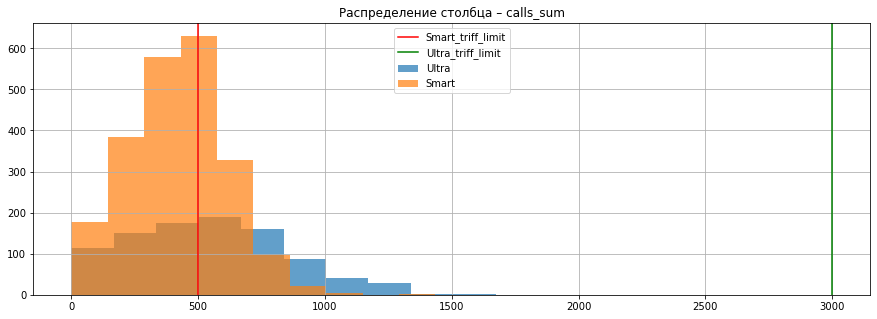

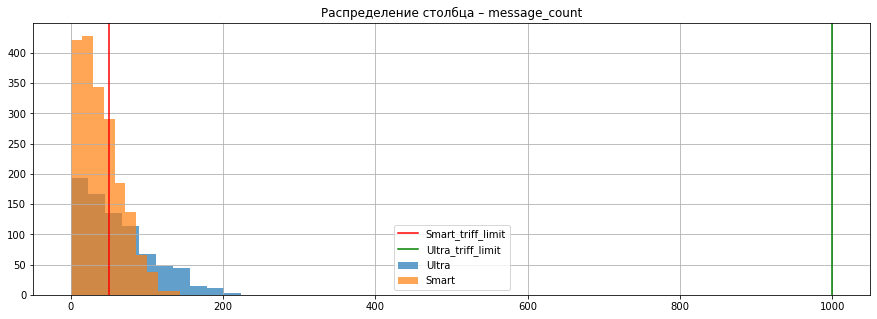

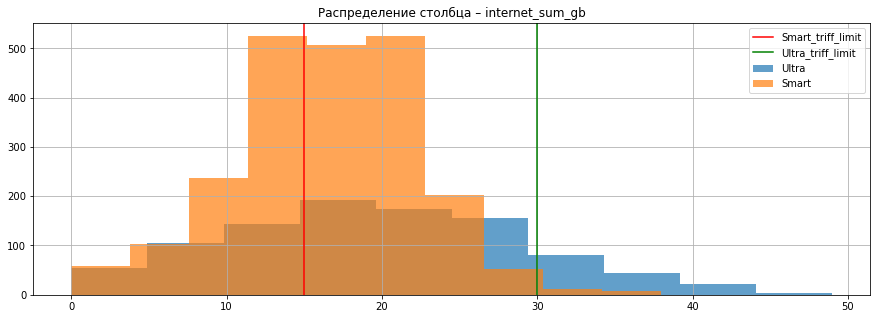

In [205]:
for i in range(len(numeric_columns_1)):
    df_ultra[numeric_columns_1[i]].hist(figsize=(15,5), alpha = 0.7, label='Ultra')
    df_smart[numeric_columns_1[i]].hist(figsize=(15,5), alpha = 0.7, label='Smart')
    plt.axvline(x=axv_cond[0][i], label='Smart_triff_limit', color = 'r')
    plt.axvline(x=axv_cond[1][i], label='Ultra_triff_limit', color = 'g')
    plt.title(f"Распределение столбца – {numeric_columns_1[i]}")
    plt.legend()
    plt.show()

Распределение среденего количества минут разговора и объема интернет-трафика по каждому абоненту в месяц стремится к нормальному распределению. Распределение среднего по количеству сообщений скошено впарво и более напоминает пуассоновское распределение (возможно, потому, что некоторые клиенты не пользуются сообщениями и во многих строках таблицы df имеются пустые значения по этому показателю? т.е колчество наблюдений меньше, чем по звонкам и интернет-трафику). Однако 99% всех значений находятся в промежутке (μ−3σ,μ+3σ) для всех анализируемых средних.   
В целом по тарифу smart средние более кучно расположены к среднему по совокупности из-за большего размера выборки. Разброс средних по всем показателям достаточно высокий

### 3.1 Вывод

1. Разброс средних значений продолжительности звонков, количества сообщений и интернет-трафика по каждому пользователю внутри каждого тарифа существенный (большое СКО).
2. Распределение всех анализируемых средних (количество минут разговора, количество сообщений, объем интернет-трафика по каждому абоненту в месяц) стремится к нормальному распределению. 

# 4 Проверка гипотез

Первая нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова. Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.  
Расчеты будем делать на основании среднего значения выручки по месяцам в таблицах df_ultra и df_smart

In [200]:
alpha = 0.05
results = st.ttest_ind(df_smart['revenue'], df_ultra['revenue'], equal_var = True)
print('p-значение:', results.pvalue)

p-значение: 8.081909555489933e-161


In [201]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Полученное значение p-value близко к нулю и говорит о том, что средняя выручка клиентов разных тарифов неодинакова, с нулевой вероятностью такое различие можно получить случайно. Можно предположить, что клиенты двух тарифов принадлежат к двум разным генеральным совокупностям.

Вторая нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  
Для проверки используем аналитические таблицы df_moscow и df_other.

In [202]:
alpha = 0.05
results = st.ttest_ind(df_moscow['revenue'], df_other['revenue'], equal_var = True)
print('p-значение:', results.pvalue)

p-значение: 0.5400751614511182


In [203]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Условная вероятность того, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, составила 54%. Статистически достоверные различия не обнаружены и разница между жвумя группами клиетов может быть случайной.

## 4.1 Вывод

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Клиенты этих тарифов относятся к разным генеральным совокупностям.
2. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, это представители одной генеральной совокупности.

# 5 Общий вывод

1. Для проведения расчетов была подготовлена аналитическая таблица df, совмещающая в себе данные из всех файлов по ключевым характеристикам клиентов. На ее основе проводились все группировки и расчеты.
2. Тариф smart более популярный, его клиенты в среднем укладываются в лимит по минутам и сообщениям, но интренет-трафик расходуют сверх включенного в пакет. По обоим тарифам интернет приносит ощутимый доход сверх абонентской платы.
3. С учетом того, что количество пользователей тарифа ultra в выборке меньше более, чем в два раза по сравнению со smart, вручка по нему сопоставима со smart (2 816 365 руб. - smart и 2 080 050 руб. - ultra).
4. Клиенты smart приносят доход сверх ежемесячной абонентской платы по всем трем составляющим пакета.
5. Пользователи тарифов ultra и smart относятся к разным генеральным совокупностям. Ultra - это скорее о корпоративных клиентах, smart - физ лица.
6. Тариф ultra по выручке имеет преимущества перед smart.
7. Если исходить из конкуренции между двумя тарифами внутри одного оператора связи, то предпочтение нужно отдать ultra.
8. Если исходить из конкуренции с другими операторами связи, то smart.